###### FIRST TRY OF ANALYSIS IN KAGGLE: TITANIC


1. Importing train data

In [1]:
import pandas as pd; import numpy as np; import matplotlib as mpl; import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('D:/datasets/titanic/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2. Data Cleaning: Correcting, Completing, Creating, and Converting

In [7]:
train['Age'].fillna(train['Age'].median(), inplace=True)                    #Completing 'Age' data with 'Age' median

In [8]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)         #Completing 'Embarked' data with 'Embarked' mode

In [9]:
train.drop(columns=['Cabin', 'PassengerId', 'Ticket'], inplace=True)        #Dropping useless data columns

In [10]:
train['FamilyMembers'] = train['SibSp'] + train['Parch'] + 1               #Creating 'FamilyMembers'

In [11]:
train['IsAlone'] = (train['FamilyMembers'] == 1).add(0)                    #Creating 'IsAlone'

In [12]:
train.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilyMembers    0
IsAlone          0
dtype: int64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilyMembers    891 non-null int64
IsAlone          891 non-null int32
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 73.2+ KB


In [14]:
train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyMembers,IsAlone
621,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,52.5542,S,2,0
299,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,247.5208,C,2,0
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,18.0000,S,2,0
204,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,8.0500,S,1,1
144,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.5000,S,1,1
489,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1,1,15.9000,S,3,0
177,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,28.7125,C,1,1
878,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,7.8958,S,1,1
253,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,16.1000,S,2,0
731,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,18.7875,C,1,1


3. Analysis with Cleaned Data

In [15]:
train.pivot_table('Survived', index='Sex', margins=True)

,Survived
Sex,
female,0.742038
male,0.188908
All,0.383838


In [16]:
pd.crosstab(train.Survived, train.Sex, margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [17]:
factors = ['Pclass', 'Sex', 'SibSp', 'Parch', 'FamilyMembers', 'Embarked', 'IsAlone']

In [18]:
for x in factors:
    print('-' * 20)
    print(train.pivot_table('Survived', index=x))

--------------------
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
--------------------
        Survived
Sex             
female  0.742038
male    0.188908
--------------------
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
--------------------
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000
--------------------
               Survived
FamilyMembers          
1              0.303538
2              0.552795
3              0.578431
4              0.724138
5              0.200000
6              0.136364
7              0.333333
8              0.000000
11             0.000000
--------------------
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009
--------------------
         Survived
IsAlone          
0        0.505650

Text(0.5,1,'Family Members Histogram by Survival')

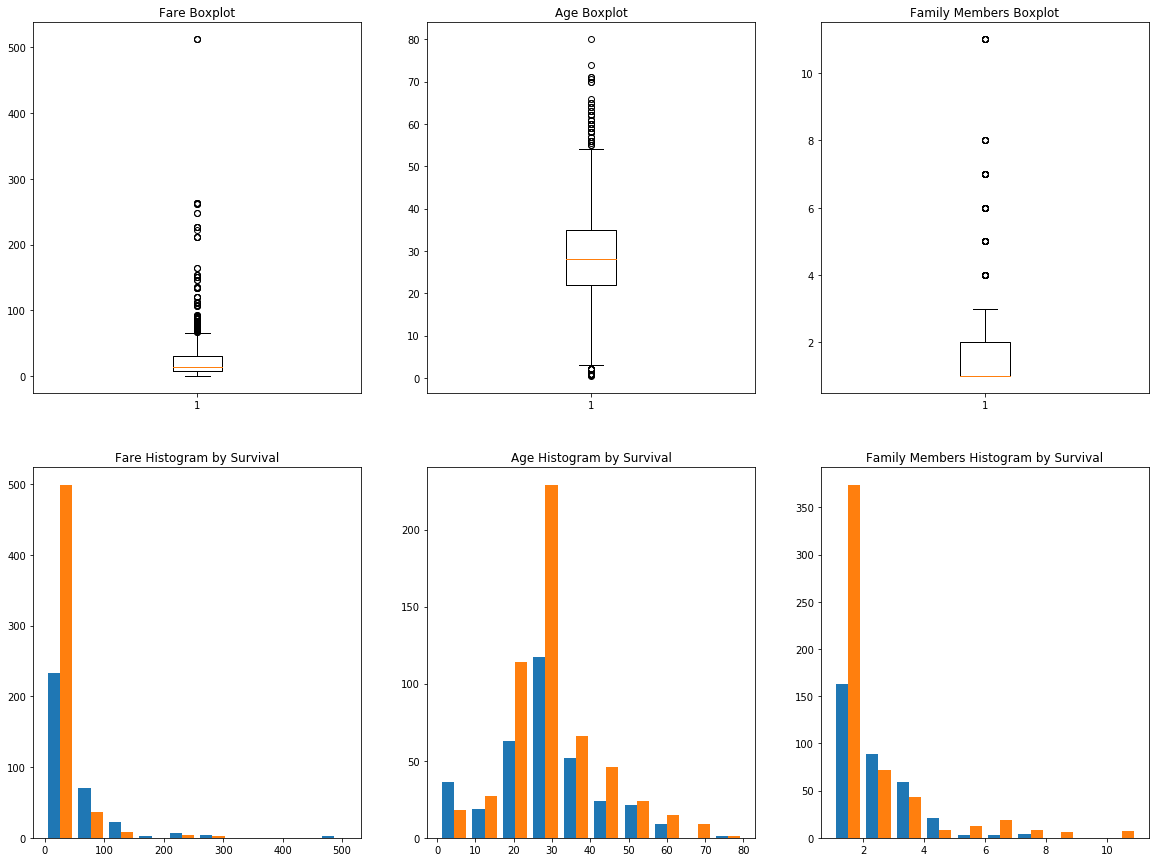

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(20,15))
axs[0, 0].boxplot(train['Fare'])
axs[0, 0].set_title('Fare Boxplot')
axs[0, 1].boxplot(train['Age'])
axs[0, 1].set_title('Age Boxplot')
axs[0, 2].boxplot(train['FamilyMembers'])
axs[0, 2].set_title('Family Members Boxplot')
axs[1, 0].hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], label=['Suvived', 'Dead'])
axs[1, 0].set_title('Fare Histogram by Survival')
axs[1, 1].hist([train[train['Survived'] == 1]['Age'], train[train['Survived'] == 0]['Age']], label=['Suvived', 'Dead'])
axs[1, 1].set_title('Age Histogram by Survival')
axs[1, 2].hist([train[train['Survived'] == 1]['FamilyMembers'], train[train['Survived'] == 0]['FamilyMembers']], label=['Suvived', 'Dead'])
axs[1, 2].set_title('Family Members Histogram by Survival')

In [20]:
import seaborn as sns

C:\Users\jason\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


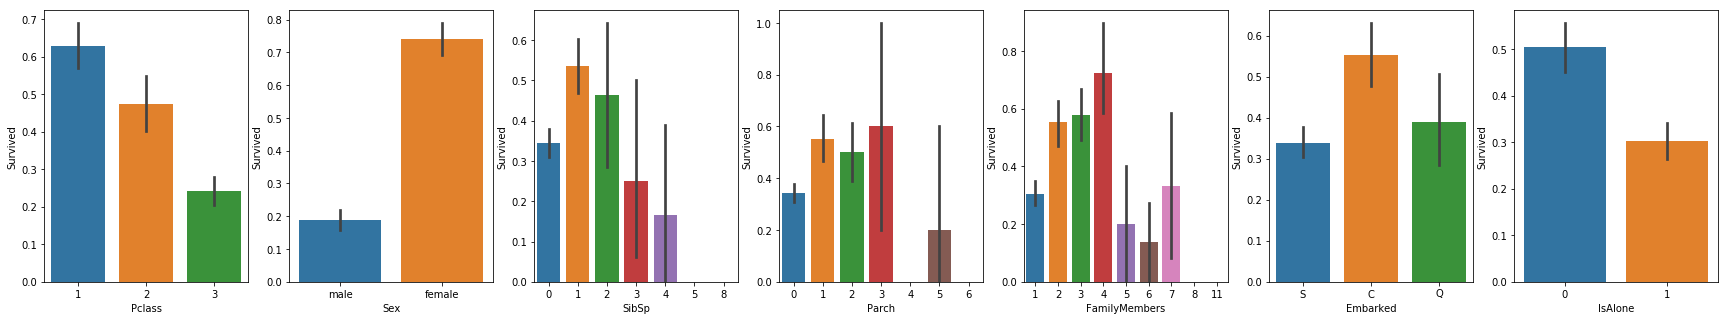

In [21]:
fig, axs = plt.subplots(1, len(factors), figsize=(30, 5))
for i in range(len(factors)):
    sns.barplot(ax=axs[i], x=factors[i], y='Survived', data=train)